# PCA Data EDA

__Objective:__ Prepare some quick visual to help describe the baseline data.

## Import Packages And Data

In [2]:
# packages
import pandas as pd
from plotnine import *

In [9]:
# data
base_data = pd.read_csv('Pnuemonia Images PCA Reduced.csv')\
    .drop('Unnamed: 0', axis = 1)
print('base_data shape:', base_data.shape)
base_data.head()

base_data shape: (8340, 22)


,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,...,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,y,set
0,2.980556,-3.275862,-4.229456,2.637369,4.997620,0.030935,-0.637579,-2.737229,-1.515862,1.247825,...,2.262131,1.716593,-1.203664,-0.265968,-0.150226,-0.174117,1.890962,-1.688081,bacteria,train
1,-6.564300,-4.057967,-6.552143,2.327029,-6.808690,3.417830,-2.390260,-4.471826,-0.473078,-4.866542,...,2.190049,1.391780,-1.850598,0.930205,1.780812,2.484309,1.469409,0.174022,normal,train
2,-0.617359,-9.007158,-9.107250,2.815919,4.204915,1.636615,-5.198943,3.210807,-0.030567,-4.537741,...,2.359346,1.464532,0.006303,0.957595,0.568377,-0.521341,-0.036893,-1.370491,normal,train
3,-7.003130,-1.783275,5.344337,-4.681501,0.287496,-4.657435,2.194726,-0.011661,4.251541,1.422850,...,1.786465,1.641857,1.541782,-4.641932,-1.166219,0.500252,-0.014694,-1.256362,bacteria,train
4,-14.654309,7.030771,13.029172,0.395497,4.705183,1.842881,-3.591075,5.124075,6.235257,2.200029,...,1.616399,-0.334545,-0.133705,-4.512167,0.141734,5.402647,3.840050,4.003119,bacteria,train


## Tidy And Transform

In [30]:
df = base_data.melt(id_vars = ['y', 'set'])
# df = df[df['set'] == 'train']
df['y'] = df['y'].str.title()
df.head()

,y,set,variable,value
0,Bacteria,train,pca0,2.980556
1,Normal,train,pca0,-6.564300
2,Normal,train,pca0,-0.617359
3,Bacteria,train,pca0,-7.003130
4,Bacteria,train,pca0,-14.654309


## Plot

C:\Users\nccru\anaconda3\envs\gt-oms-isye-6740\lib\site-packages\plotnine\ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
C:\Users\nccru\anaconda3\envs\gt-oms-isye-6740\lib\site-packages\plotnine\ggplot.py:588: PlotnineWarning: Filename: images/PCA EDA Density Plots.png


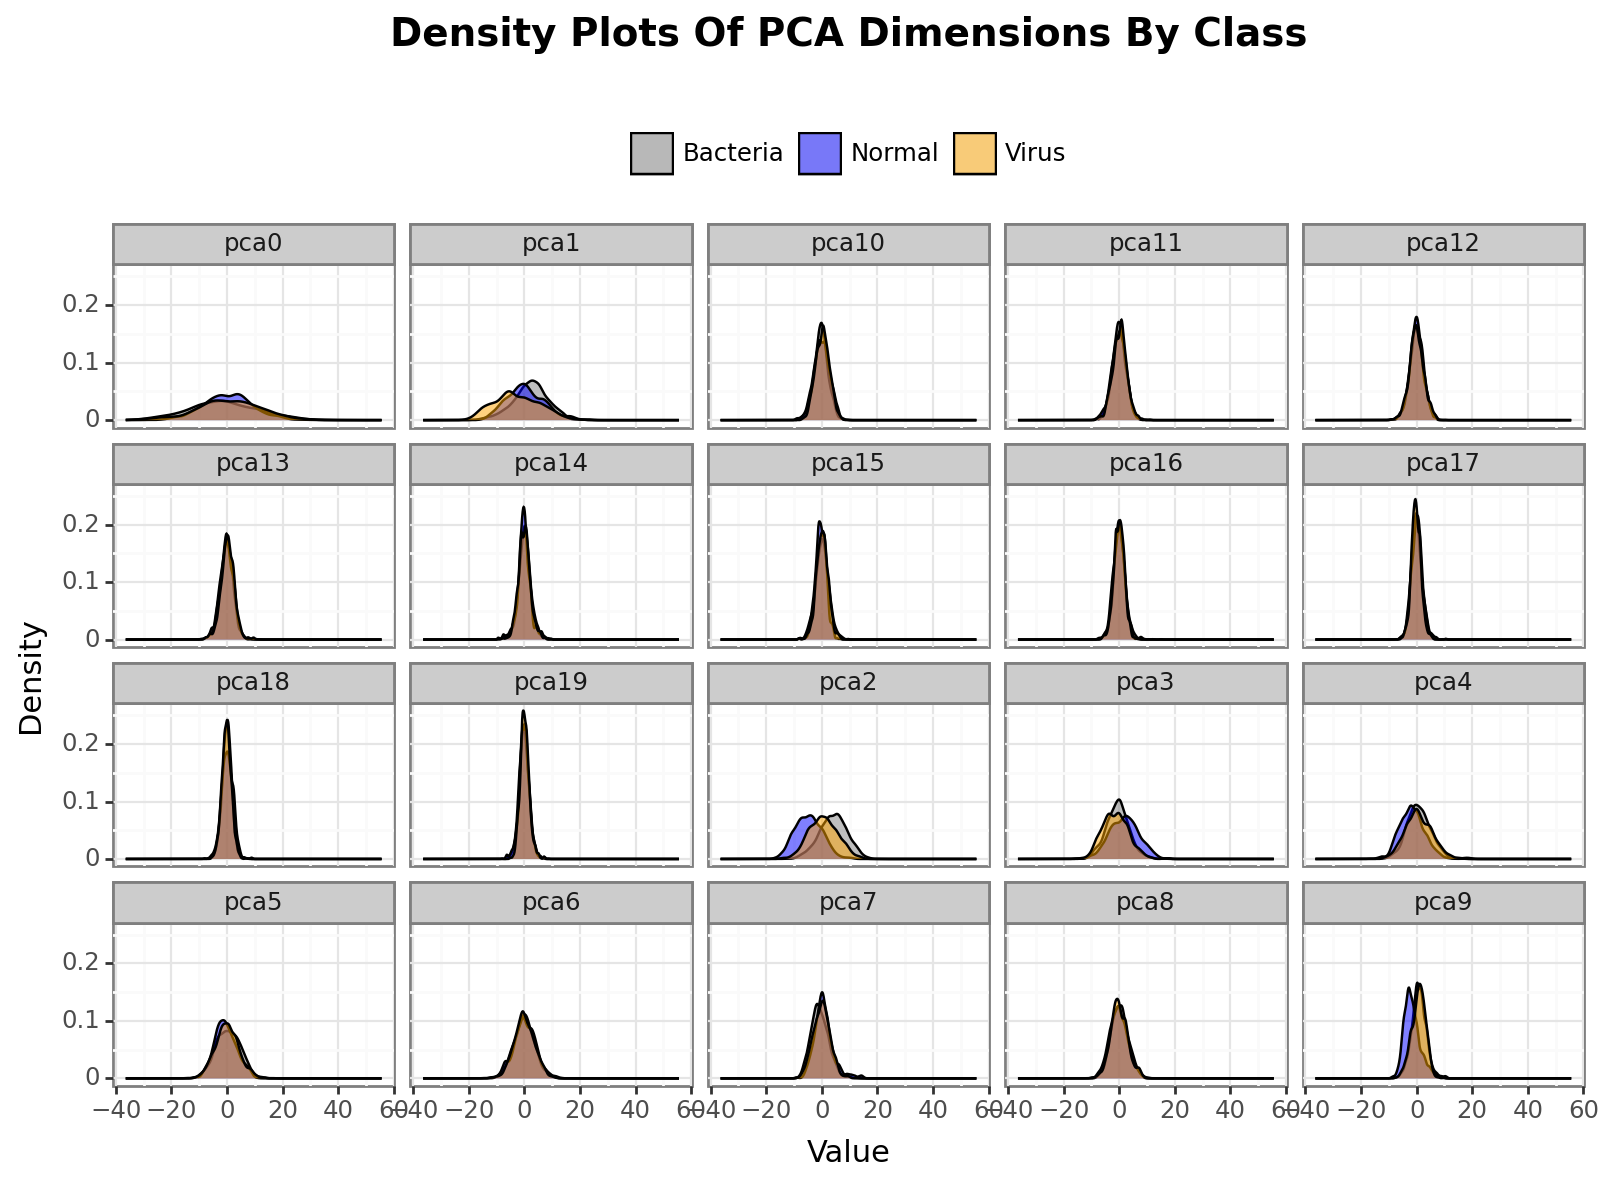

<Figure Size: (800 x 600)>

In [29]:
fig = (
    ggplot(df, aes("value")) + 
        geom_density(aes(fill = "y"), alpha = 0.5) + 
        facet_wrap("~ variable") + 
        labs(
            title = "Density Plots Of PCA Dimensions By Class",
            fill = "",
            x = "Value",
            y = "Density"
        ) + 
        scale_fill_manual(values = ["grey", "blue", "orange"]) + 
        theme_bw() + 
        theme(
            figure_size = (8, 6),
            legend_position = "top",
            plot_title = element_text(hjust = 0.5, face = "bold", size = 14)
        )
)

fig.save(filename = 'images/PCA EDA Density Plots.png', dpi = 300)

fig